In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split
import cv2
from PIL import Image 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [3]:
# !pip install opencv-python


# Extracting images from the folder and converiting to numerical data/data Preprocessing

In [4]:
import zipfile as zf
files = zf.ZipFile('images.zip', 'r')
files.extractall('directory to extract')
files.close()

In [5]:
files

<zipfile.ZipFile [closed]>

In [6]:
folder_path_no_tumor = "C://Users//kmaha//OneDrive//Documents//Ml Project//directory to extract//Training//no_tumor"
folder_path_m_tumor = "C://Users//kmaha//OneDrive//Documents//Ml Project//directory to extract//Training//meningioma_tumor"
folder_path_p_tumor ="C://Users//kmaha//OneDrive//Documents//Ml Project//directory to extract//Training//pituitary_tumor"
folder_path_g_tumor = "C://Users//kmaha//OneDrive//Documents//Ml Project//directory to extract//Training//glioma_tumor"

folder_no = os.listdir(folder_path_no_tumor)
folder_m = os.listdir(folder_path_m_tumor)
folder_p = os.listdir(folder_path_p_tumor)
folder_g = os.listdir(folder_path_g_tumor)

print(len(folder_no))
print(len(folder_m))
print(len(folder_p))
print(len(folder_g))

395
822
827
826


In [7]:
folder_no[:4]

['1.jpg', '2.jpg', '3.jpg', '4.jpg']

#### 0 represents no tumor
#### 1 represents m tumor
#### 2 represents p tumor
#### 3 reprsents g tumor

In [8]:
no_label = [0]*len(folder_no)
m_label = [1]*len(folder_m)
p_label = [2]*len(folder_p)
g_label = [3]*len(folder_g)

labels = no_label + m_label + p_label + g_label
print(len(labels))

2870


In [9]:
print(labels[:5])
print(labels[-5:])

[0, 0, 0, 0, 0]
[3, 3, 3, 3, 3]


In [10]:
imgdata = []

for img in folder_no:
    image = Image.open("C:/Users/kmaha/OneDrive/Documents/Ml Project/directory to extract/Training/no_tumor/"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    imgdata.append(image)
    
for img in folder_m:
    image = Image.open("C:/Users/kmaha/OneDrive/Documents/Ml Project/directory to extract/Training/meningioma_tumor/"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    imgdata.append(image)
    
for img in folder_p:
    image = Image.open("C:/Users/kmaha/OneDrive/Documents/Ml Project/directory to extract/Training/pituitary_tumor/"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    imgdata.append(image)

for img in folder_g:
    image = Image.open("C:/Users/kmaha/OneDrive/Documents/Ml Project/directory to extract/Training/glioma_tumor/"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    imgdata.append(image)

imgdata[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [11]:
imgdata[0].shape

(224, 224, 3)

### dividing the independent and dependent variables along with assigning class labels and image visulaization

In [12]:
x = np.array(imgdata)
y = np.array(labels)

In [13]:
pd.Series(y).value_counts()

2    827
3    826
1    822
0    395
dtype: int64

In [14]:
x.shape

(2870, 224, 224, 3)

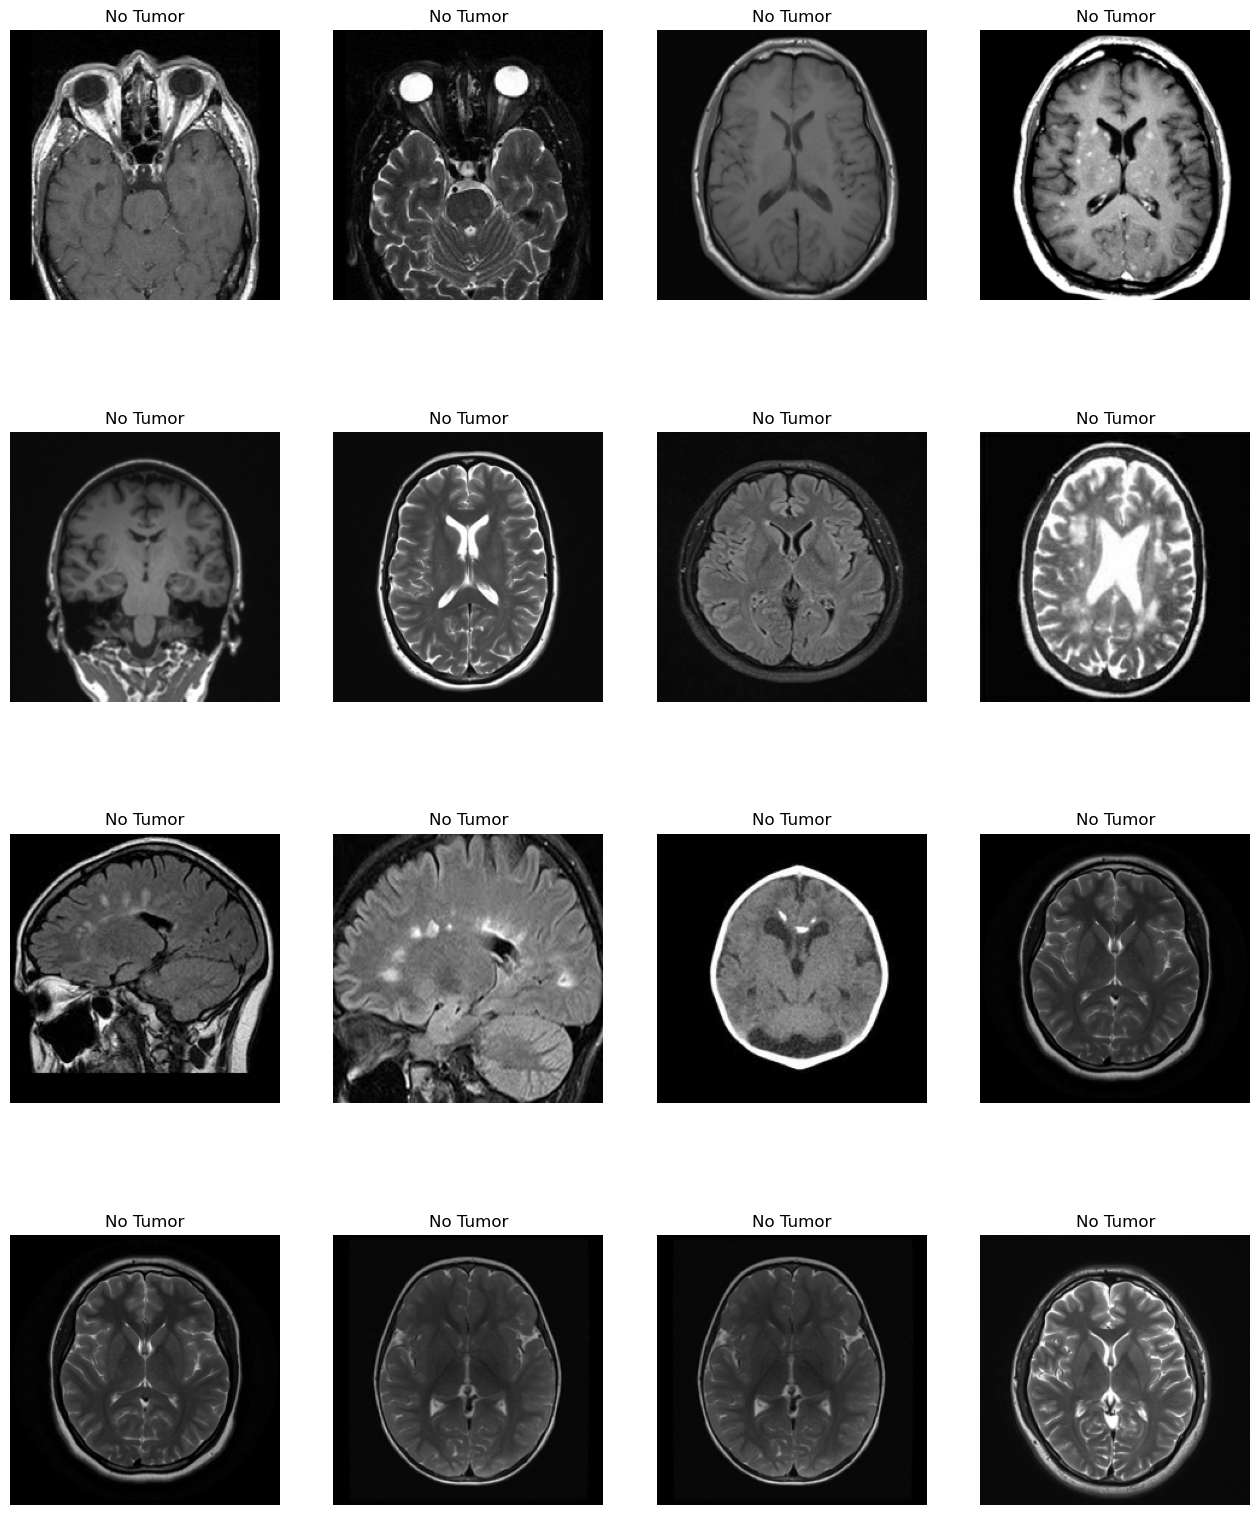

In [15]:
class_labels=["No Tumor","Meningioma Tumor","pituitary Tumor","glioma Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x[i])
    plt.title(f"{class_labels[y[i]]}")
    plt.axis("off")

# Reshaping the 4-d data into 2-d dataframe

In [16]:
import numpy as np
x_2d = x.reshape(x.shape[0], -1)
import pandas as pd
data = pd.DataFrame(x_2d)
data['class_label'] = y

In [17]:
X= data.drop(columns=['class_label'])
Y=data['class_label']

# Dimensionality reduction and fixing the value for n_components Feature Engineering and Extraction

In [18]:
data

,0,1,2,3,4,5,6,7,8,9,...,150519,150520,150521,150522,150523,150524,150525,150526,150527,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,10,10,10,10,10,10,10,10,10,10,...,9,9,9,9,9,9,11,11,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,3
2866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2867,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,3
2868,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,3


In [19]:
x_train,x_test,y_train,y_test = train_test_split(data,Y,test_size=0.20,shuffle=True,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2296, 150529)
(574, 150529)
(2296,)
(574,)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [21]:
from sklearn.decomposition import PCA
list=[100,200,300,400,500,600,700,800,900,1000]
accuracy1=[]
accuracy2=[]
accuracy3=[]
list_of_data_frames=[]
for i in list:
    pca = PCA(n_components = i)
    pca.fit(X)
    data_pca1 = pca.transform(X)
    data_pca1 = pd.DataFrame(data_pca1,columns=[j for j in range(i)])
    list_of_data_frames.append(data_pca1)
    x_train,x_test,y_train,y_test = train_test_split(data_pca1,Y,test_size=0.20,shuffle=True,random_state=42)
    from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
    
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy1.append(accuracy)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy2.append(accuracy)
    
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy3.append(accuracy)


### Class IMBALANCE

In [22]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Assuming you have a list of dataframes named list_of_data_frames

# Combine the dataframes into a single dataframe
X_pca = pd.concat(list_of_data_frames, axis=1)

# Assuming you have labels stored in a variable named Y
Y = np.array(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(list_of_data_frames[0], Y, test_size=0.2, random_state=42)

# Perform oversampling to balance the classes on the training set
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, Y_train)

In [23]:
from collections import Counter

# Print original label counts
print("Original Label Counts:")
print(Counter(y_train))

# Print label counts after oversampling
print("\nLabel Counts After Oversampling:")
print(Counter(Y_train_resampled))


Original Label Counts:
Counter({3: 671, 2: 666, 1: 642, 0: 317})

Label Counts After Oversampling:
Counter({2: 671, 1: 671, 3: 671, 0: 671})


In [24]:
accuracy3=[]
for i in list_of_data_frames:
    x_train,x_test,y_train,y_test = train_test_split(i,Y,test_size=0.20,shuffle=True,random_state=42)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy3.append(accuracy)

In [25]:
accuracy1

[0.8501742160278746,
 0.8501742160278746,
 0.8327526132404182,
 0.8170731707317073,
 0.8257839721254355,
 0.8048780487804879,
 0.8013937282229965,
 0.8118466898954704,
 0.8066202090592335,
 0.8013937282229965]

In [26]:
accuracy2

[0.837979094076655,
 0.8240418118466899,
 0.7979094076655052,
 0.764808362369338,
 0.7665505226480837,
 0.7630662020905923,
 0.759581881533101,
 0.7491289198606271,
 0.740418118466899,
 0.7473867595818815]

In [81]:
accuracy3

[0.8083623693379791,
 0.794425087108014,
 0.7839721254355401,
 0.7874564459930313,
 0.7874564459930313,
 0.7804878048780488,
 0.7752613240418118,
 0.7717770034843205,
 0.7735191637630662,
 0.7717770034843205]

In [28]:
for i in list_of_data_frames:
    x_train,x_test,y_train,y_test = train_test_split(i,Y,test_size=0.20,shuffle=True,random_state=42)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)

[[ 56   3  11   8]
 [ 21 112   8  39]
 [  0   4 156   1]
 [  1  13   1 140]]
[[ 56   3  12   7]
 [ 22 108  11  39]
 [  0   5 154   2]
 [  1  13   3 138]]
[[ 52   5  14   7]
 [ 23 104  13  40]
 [  0   4 155   2]
 [  1  12   3 139]]
[[ 52   5  11  10]
 [ 21 105  13  41]
 [  0   3 156   2]
 [  2  11   3 139]]
[[ 50   5  11  12]
 [ 21 106  14  39]
 [  0   2 157   2]
 [  2  10   4 139]]
[[ 51   5  12  10]
 [ 23 103  13  41]
 [  0   2 157   2]
 [  2  12   4 137]]
[[ 51   5  12  10]
 [ 22 101  14  43]
 [  0   2 157   2]
 [  3  12   4 136]]
[[ 50   5  14   9]
 [ 22 101  14  43]
 [  0   3 156   2]
 [  3  12   4 136]]
[[ 49   5  14  10]
 [ 22 102  13  43]
 [  0   3 156   2]
 [  3  12   3 137]]
[[ 49   5  14  10]
 [ 23 101  13  43]
 [  0   3 156   2]
 [  3  11   4 137]]


In [29]:
for i in list_of_data_frames:
    x_train,x_test,y_train,y_test = train_test_split(i,Y,test_size=0.20,shuffle=True,random_state=42)
    model = XGBClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)

[[ 57  10   7   4]
 [ 15 135   9  21]
 [  0   4 156   1]
 [  0  14   1 140]]
[[ 52  13   8   5]
 [ 13 140   9  18]
 [  0   2 157   2]
 [  0  14   2 139]]
[[ 50  13   7   8]
 [  8 137   8  27]
 [  0   3 156   2]
 [  0  17   3 135]]
[[ 46  19   8   5]
 [ 13 134   9  24]
 [  0   3 155   3]
 [  0  17   4 134]]
[[ 52  12   8   6]
 [ 10 136   9  25]
 [  0   5 155   1]
 [  0  20   4 131]]
[[ 46  16   8   8]
 [ 13 133  11  23]
 [  0   3 155   3]
 [  0  23   4 128]]
[[ 48  14   8   8]
 [ 12 129  10  29]
 [  0   3 155   3]
 [  0  22   5 128]]
[[ 48  17   8   5]
 [ 11 133  11  25]
 [  0   4 155   2]
 [  0  21   4 130]]
[[ 49  13  10   6]
 [ 13 131  11  25]
 [  0   3 156   2]
 [  0  21   7 127]]
[[ 45  13  11   9]
 [ 10 129  11  30]
 [  0   2 156   3]
 [  0  21   4 130]]


In [30]:
recallKNN=[]
precisionKNN=[]

In [31]:
for i in list_of_data_frames:
    x_train,x_test,y_train,y_test = train_test_split(i,Y,test_size=0.20,shuffle=True,random_state=42)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    class_0_precision = report["0"]["precision"]
    class_0_recall = report["0"]["recall"]
    class_1_precision = report["1"]["precision"]
    class_1_recall = report["1"]["recall"]
    class_2_precision = report["2"]["precision"]
    class_2_recall = report["2"]["recall"]
    class_3_precision = report["3"]["precision"]
    class_3_recall = report["3"]["recall"]
    recallKNN.append([class_0_recall,class_1_recall,class_2_recall,class_3_recall])
    precisionKNN.append([class_0_precision,class_1_precision,class_2_precision,class_3_precision])

    
    


In [32]:
rknn=[]
pknn=[]
import statistics
for i in recallKNN:
    rknn.append(statistics.mean(i))

In [33]:
for i in precisionKNN:
    pknn.append(statistics.mean(i))

In [34]:
pknn

[0.7993695134652581,
 0.7858902753114438,
 0.7733525165703217,
 0.7791312191521241,
 0.7786911198935509,
 0.7701133949363096,
 0.7660833438939343,
 0.7617385295487709,
 0.7626197700046689,
 0.760691566399287]

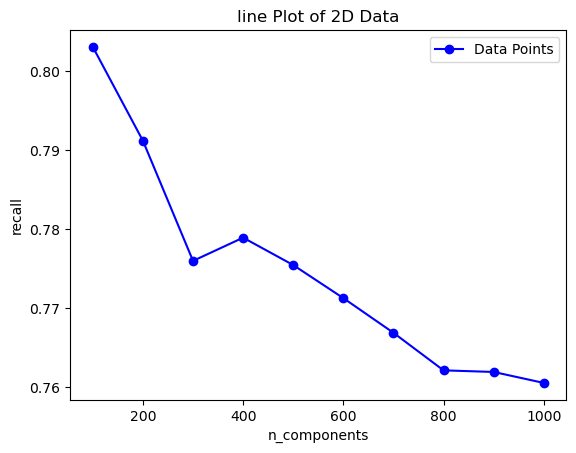

In [35]:
import matplotlib.pyplot as plt
y = rknn
x = [i for i in list]
plt.plot(x, y, label='Data Points', color='b', marker='o')
plt.xlabel('n_components')
plt.ylabel('recall')
plt.title('line Plot of 2D Data')
plt.legend()
plt.show()


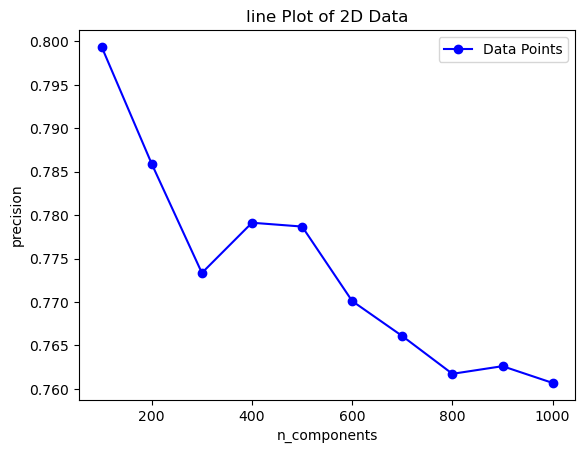

In [36]:
y = pknn
x = [i for i in list]
plt.plot(x, y, label='Data Points', color='b', marker='o')
plt.xlabel('n_components')
plt.ylabel('precision')
plt.title('line Plot of 2D Data')
plt.legend()
plt.show()

In [37]:
precisionRFC=[]
recallRFC=[]

In [38]:
for i in list_of_data_frames:
    x_train,x_test,y_train,y_test = train_test_split(i,Y,test_size=0.20,shuffle=True,random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    class_0_precision = report["0"]["precision"]
    class_0_recall = report["0"]["recall"]
    class_1_precision = report["1"]["precision"]
    class_1_recall = report["1"]["recall"]
    class_2_precision = report["2"]["precision"]
    class_2_recall = report["2"]["recall"]
    class_3_precision = report["3"]["precision"]
    class_3_recall = report["3"]["recall"]
    recallRFC.append([class_0_recall,class_1_recall,class_2_recall,class_3_recall])
    precisionRFC.append([class_0_precision,class_1_precision,class_2_precision,class_3_precision])

In [39]:
rrfc=[]
prfc=[]
import statistics
for i in recallKNN:
    rrfc.append(statistics.mean(i))
for i in precisionKNN:
    prfc.append(statistics.mean(i))

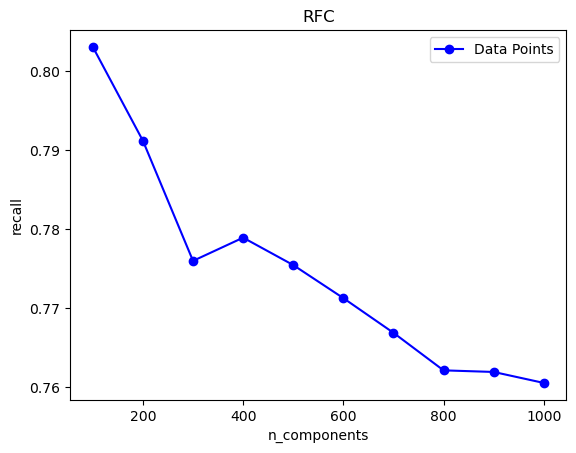

In [40]:
import matplotlib.pyplot as plt
y = rrfc
x = [i for i in list]
plt.plot(x, y, label='Data Points', color='b', marker='o')
plt.xlabel('n_components')
plt.ylabel('recall')
plt.title('RFC')
plt.legend()
plt.show()

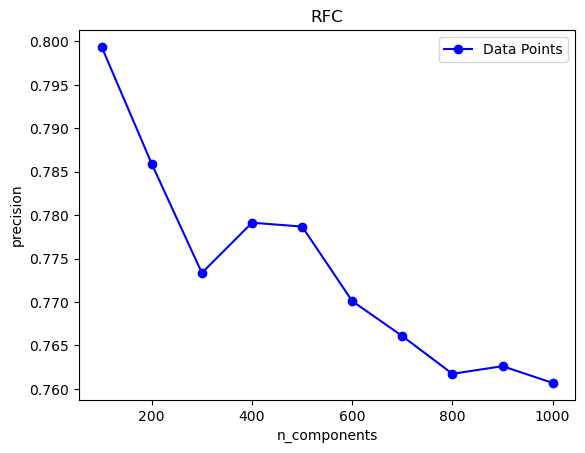

In [41]:
y = prfc
x = [i for i in list]
plt.plot(x, y, label='Data Points', color='b', marker='o')
plt.xlabel('n_components')
plt.ylabel('precision')
plt.title('RFC')
plt.legend()
plt.show()

In [42]:
recallXGB=[]
precisionXGB=[]
for i in list_of_data_frames:
    x_train,x_test,y_train,y_test = train_test_split(i,Y,test_size=0.20,shuffle=True,random_state=42)
    model = XGBClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    class_0_precision = report["0"]["precision"]
    class_0_recall = report["0"]["recall"]
    class_1_precision = report["1"]["precision"]
    class_1_recall = report["1"]["recall"]
    class_2_precision = report["2"]["precision"]
    class_2_recall = report["2"]["recall"]
    class_3_precision = report["3"]["precision"]
    class_3_recall = report["3"]["recall"]
    recallXGB.append([class_0_recall,class_1_recall,class_2_recall,class_3_recall])
    precisionXGB.append([class_0_precision,class_1_precision,class_2_precision,class_3_precision])

In [43]:
rxgb=[]
pxgb=[]
import statistics
for i in recallXGB:
    rxgb.append(statistics.mean(i))
for i in precisionXGB:
    pxgb.append(statistics.mean(i))

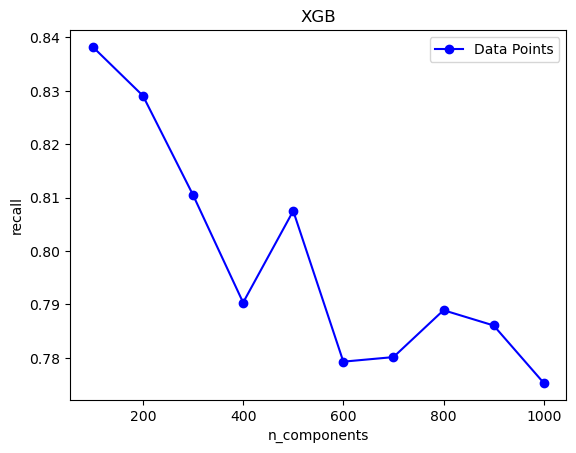

In [44]:
import matplotlib.pyplot as plt
y = rxgb
x = [i for i in list]
plt.plot(x, y, label='Data Points', color='b', marker='o')
plt.xlabel('n_components')
plt.ylabel('recall')
plt.title('XGB')
plt.legend()
plt.show()

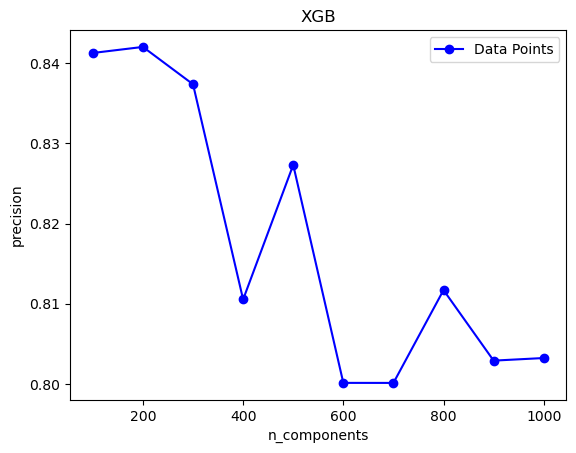

In [45]:
y = pxgb
x = [i for i in list]
plt.plot(x, y, label='Data Points', color='b', marker='o')
plt.xlabel('n_components')
plt.ylabel('precision')
plt.title('XGB')
plt.legend()
plt.show()

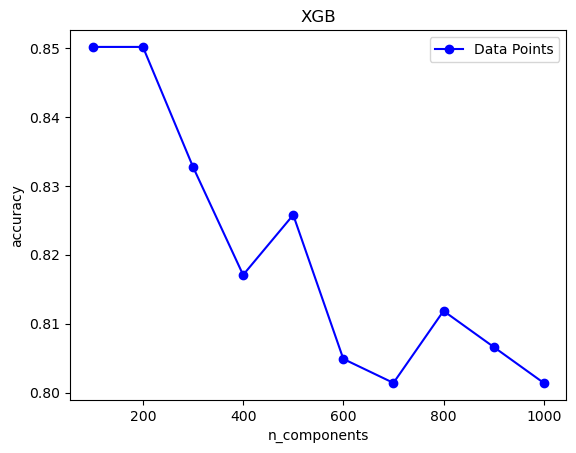

In [46]:
y = accuracy1
x = [i for i in list]
plt.plot(x, y, label='Data Points', color='b', marker='o')
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('XGB')
plt.legend()
plt.show()

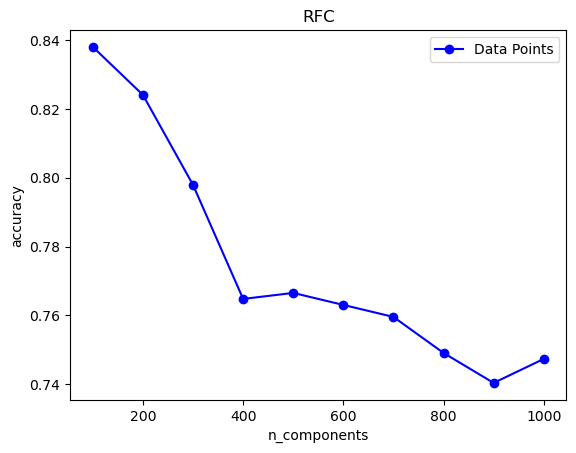

In [47]:
y = accuracy2
x = [i for i in list]
plt.plot(x, y, label='Data Points', color='b', marker='o')
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('RFC')
plt.legend()
plt.show()

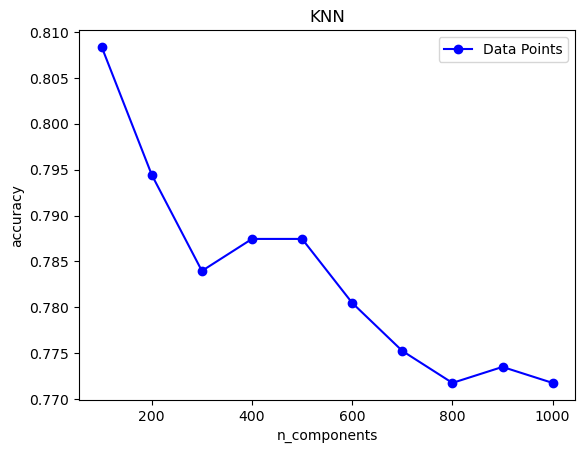

In [48]:
y = accuracy3
x = [i for i in list]
plt.plot(x, y, label='Data Points', color='b', marker='o')
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('KNN')
plt.legend()
plt.show()

### REVIEW @ 2

### SVM

In [ ]:
from sklearn.svm import SVC


best_pca_components_svm = []

for i in list:
    pca = PCA(n_components=i)
    pca.fit(X)
    data_pca1 = pca.transform(X)
    data_pca1 = pd.DataFrame(data_pca1, columns=[j for j in range(i)])
    x_train, x_test, y_train, y_test = train_test_split(data_pca1, Y, test_size=0.20, shuffle=True, random_state=42)

    # SVM
    model_svm = SVC()
    model_svm.fit(x_train, y_train)
    y_pred_svm = model_svm.predict(x_test)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)

    # Find the best PCA components for SVM
    if not best_pca_components_svm or accuracy_svm > best_pca_components_svm[-1]:
        best_pca_components_svm = [i, data_pca1, y_test, y_pred_svm, accuracy_svm]

# Use the best PCA components for SVM
best_pca_components_svm_i, best_pca_data_svm, best_y_test_svm, best_y_pred_svm, best_accuracy_svm = best_pca_components_svm
print(f"Best number of PCA components for SVM: {best_pca_components_svm_i}")
print(f"Best accuracy for SVM: {best_accuracy_svm}")



### CNN

In [50]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Assuming you have already loaded and preprocessed your data into variables imgdata and labels

# Convert labels to one-hot encoding
labels_onehot = to_categorical(labels, num_classes=4)

# Convert imgdata to a NumPy array
imgdata = np.array(imgdata)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(imgdata, labels_onehot, test_size=0.2, random_state=42)

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy on the test set: {accuracy}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [51]:
# Assuming you have already loaded and preprocessed your test data into variables x_test and y_test_labels

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Compare predictions with actual labels
for i in range(10):  # Displaying the first 10 predictions for illustration
    plt.figure(figsize=(5, 5))
    
    # Display the actual image
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[i])
    plt.title(f"Actual: {class_labels[y_test_labels[i]]}")
    plt.axis('off')
    
    # Display the predicted label
    plt.subplot(1, 2, 2)
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {class_labels[y_pred[i]]}")
    plt.axis('off')
    
    plt.show()


### MULTI LAYER PERCEPTRON

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Assuming you have already loaded and preprocessed your data into variables imgdata and labels

# Convert labels to one-hot encoding
labels_onehot = to_categorical(labels, num_classes=4)

# Convert imgdata to a NumPy array
imgdata = np.array(imgdata)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(imgdata, labels_onehot, test_size=0.2, random_state=42)

# Flatten the images for MLP input
x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values to be between 0 and 1
x_train_flatten, x_test_flatten = x_train_flatten / 255.0, x_test_flatten / 255.0

# Define the MLP model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(224 * 224 * 3,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_flatten, y_train, epochs=10, validation_data=(x_test_flatten, y_test))

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(x_test_flatten), axis=1)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy on the test set: {accuracy}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [53]:
# Assuming you have already loaded and preprocessed your test data into variables x_test_flatten and y_test_labels

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(x_test_flatten), axis=1)

# Compare predictions with actual labels
for i in range(10):  # Displaying the first 10 predictions for illustration
    plt.figure(figsize=(5, 5))
    
    # Display the actual image
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[i].reshape(224, 224, 3))
    plt.title(f"Actual: {class_labels[y_test_labels[i]]}")
    plt.axis('off')
    
    # Display the predicted label
    plt.subplot(1, 2, 2)
    plt.imshow(x_test[i].reshape(224, 224, 3))
    plt.title(f"Predicted: {class_labels[y_pred[i]]}")
    plt.axis('off')
    
    plt.show()


### Probablistic Model 01 -> NAIVE BAYES

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

model_naive_bayes = GaussianNB()

model_naive_bayes.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the original test set
Y_pred_naive_bayes = model_naive_bayes.predict(X_test)

# Evaluate the model on the original test set
accuracy_naive_bayes = accuracy_score(Y_test, Y_pred_naive_bayes)
print(f"Naive Bayes Accuracy: {accuracy_naive_bayes}")



Naive Bayes Accuracy: 0.6114982578397212


In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [59]:
import seaborn as sns

### Performnace metrics with naive bayes with sampling

Accuracy: 0.6114982578397212
Precision: 0.636188848708732
Recall: 0.6114982578397212
F1 Score: 0.6004957766190505
Confusion Matrix:
[[ 53   7   6  12]
 [ 25  66  20  69]
 [ 13  11 105  32]
 [  1  15  12 127]]


<Axes: >

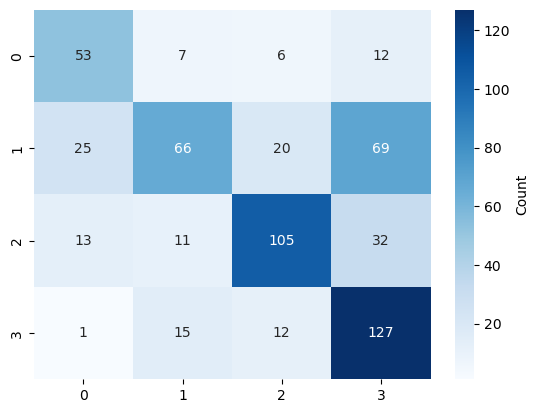

In [60]:
accuracy = accuracy_score(Y_test, Y_pred_naive_bayes)
precision = precision_score(Y_test, Y_pred_naive_bayes, average='weighted')
recall = recall_score(Y_test, Y_pred_naive_bayes, average='weighted')
f1 = f1_score(Y_test, Y_pred_naive_bayes, average='weighted')
conf_matrix = confusion_matrix(Y_test, Y_pred_naive_bayes)
cmap = 'Blues'
# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar_kws={'label': 'Count'})

Accuracy: 0.5296167247386759
Precision: 0.5285935475599159
Recall: 0.5296167247386759
F1 Score: 0.5166396578986413
Confusion Matrix:
[[ 50  16   3   9]
 [ 21  52  30  77]
 [  7  30  91  33]
 [  2  15  27 111]]


<Axes: >

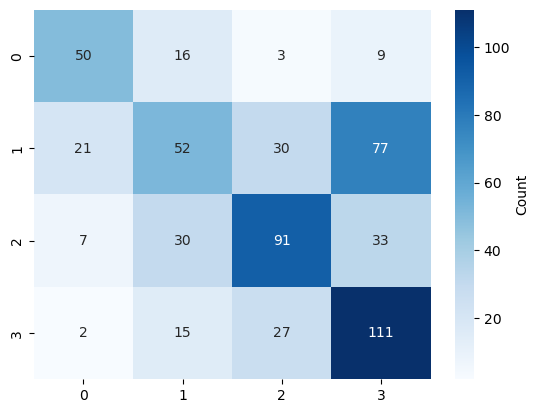

In [61]:
# accuracyw = accuracy_score(Y_test, Y_pred_naive_bayes_wo)
# precisionw = precision_score(Y_test, Y_pred_naive_bayes_wo, average='weighted')
# recallw = recall_score(Y_test, Y_pred_naive_bayes_wo, average='weighted')
# f1w = f1_score(Y_test, Y_pred_naive_bayes_wo, average='weighted')
# conf_matrixw = confusion_matrix(Y_test, Y_pred_naive_bayes_wo)

# # Print the metrics
# print(f"Accuracy: {accuracyw}")
# print(f"Precision: {precisionw}")
# print(f"Recall: {recallw}")
# print(f"F1 Score: {f1w}")
# print("Confusion Matrix:")
# print(conf_matrixw)

# sns.heatmap(conf_matrixw,annot=True, fmt='d', cmap=cmap, cbar_kws={'label': 'Count'})

### Hyperparameter tuning For Naive Bayes
1.GRIDSEARCH

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = {'var_smoothing': np.logspace(0, -9, num=10)}

# Create a Gaussian Naive Bayes model
naive_bayes_model_ht = GaussianNB()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=naive_bayes_model_ht, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, Y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluate the model with the best hyperparameters on the test set
best_naive_bayes_model = grid_search.best_estimator_
Y_pred_best_g = best_naive_bayes_model.predict(X_test)

# Calculate accuracy on the test set
accuracy_best_g = accuracy_score(Y_test, Y_pred_best_g)
print(f"Accuracy with Best Hyperparameters: {accuracy_best_g}")

Best Hyperparameters: {'var_smoothing': 1e-06}
Accuracy with Best Hyperparameters: 0.6114982578397212




 #### 2.Random SEARCH

In [64]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for var_smoothing
param_dist = {'var_smoothing': np.logspace(0, -9, num=100)}

# Create a Gaussian Naive Bayes model
naive_bayes_model_ht = GaussianNB()

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=naive_bayes_model_ht, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_resampled, Y_train_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluate the model with the best hyperparameters on the test set
best_naive_bayes_model = random_search.best_estimator_
Y_pred_best_r = best_naive_bayes_model.predict(X_test)

# Calculate accuracy on the test set
accuracy_best_r = accuracy_score(Y_test, Y_pred_best_r)
print(f"Accuracy with Best Hyperparameters: {accuracy_best_r}")


Best Hyperparameters: {'var_smoothing': 2.848035868435799e-08}
Accuracy with Best Hyperparameters: 0.6114982578397212


### 3.HYPEROPT

In [65]:
from hyperopt import fmin, tpe, hp

space = {
    'var_smoothing': hp.loguniform('var_smoothing', np.log(1e-9), np.log(1)),
}

def objective(params):
    naive_bayes_model = GaussianNB(var_smoothing=params['var_smoothing'])
    naive_bayes_model.fit(X_train_resampled, Y_train_resampled)
    Y_pred = naive_bayes_model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    return -accuracy  # Minimize negative accuracy

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10)


100%|██████████| 10/10 [00:00<00:00, 146.80trial/s, best loss: -0.6114982578397212]


### 4.OPTUNA

In [66]:
import optuna
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


def objective(trial):
    # Define the hyperparameter search space
    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-9, 1)

    # Create a Gaussian Naive Bayes model with the suggested hyperparameters
    naive_bayes_model = GaussianNB(var_smoothing=var_smoothing)

    # Train the model
    naive_bayes_model.fit(X_train, Y_train)

    # Make predictions on the test set
    Y_pred = naive_bayes_model.predict(X_test)

    # Calculate accuracy on the test set
    accuracy = accuracy_score(Y_test, Y_pred)

    return accuracy

# Create an Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)  # Adjust n_trials as needed

# Get the best hyperparameters
best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")

# Train the final model with the best hyperparameters
best_naive_bayes_model = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_naive_bayes_model.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test set with the best model
Y_pred_best_op = best_naive_bayes_model.predict(X_test)

# Calculate accuracy on the test set
accuracy_best_op = accuracy_score(Y_test, Y_pred_best_op)
print(f"Accuracy with Best Hyperparameters: {accuracy_best_op}")


[I 2023-12-05 09:17:06,319] A new study created in memory with name: no-name-1b76b73b-7f15-4e77-bbe3-46e8309530d2
[I 2023-12-05 09:17:06,330] Trial 0 finished with value: 0.6097560975609756 and parameters: {'var_smoothing': 4.096009902208555e-08}. Best is trial 0 with value: 0.6097560975609756.
[I 2023-12-05 09:17:06,338] Trial 1 finished with value: 0.6097560975609756 and parameters: {'var_smoothing': 3.988002392058516e-08}. Best is trial 0 with value: 0.6097560975609756.
[I 2023-12-05 09:17:06,347] Trial 2 finished with value: 0.6097560975609756 and parameters: {'var_smoothing': 3.8047513456444146e-06}. Best is trial 0 with value: 0.6097560975609756.
[I 2023-12-05 09:17:06,355] Trial 3 finished with value: 0.60801393728223 and parameters: {'var_smoothing': 9.858332334270073e-06}. Best is trial 0 with value: 0.6097560975609756.
[I 2023-12-05 09:17:06,363] Trial 4 finished with value: 0.6097560975609756 and parameters: {'var_smoothing': 2.3387504810952422e-09}. Best is trial 0 with val

Best Hyperparameters: {'var_smoothing': 4.096009902208555e-08}
Accuracy with Best Hyperparameters: 0.6114982578397212


There is No such improvement in HTuning For Naive bayes

### Accuracy Metrics for naive Bayes

Accuracy: 0.6114982578397212
Precision: 0.636188848708732
Recall: 0.6114982578397212
F1 Score: 0.6004957766190505
Confusion Matrix:
[[ 53   7   6  12]
 [ 25  66  20  69]
 [ 13  11 105  32]
 [  1  15  12 127]]


<Axes: >

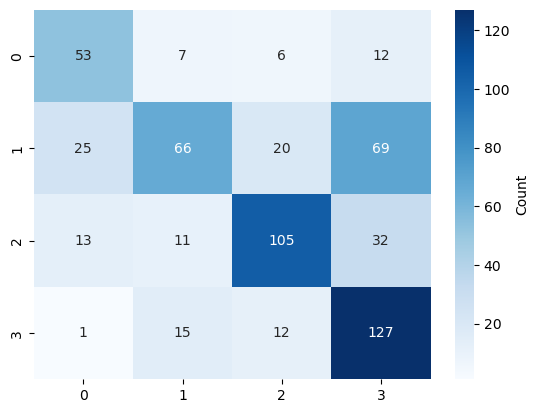

In [140]:
accuracy_nb = accuracy_score(Y_test, Y_pred_naive_bayes)
precision_nb = precision_score(Y_test, Y_pred_naive_bayes, average='weighted')
recall_nb = recall_score(Y_test, Y_pred_naive_bayes, average='weighted')
f1_nb = f1_score(Y_test, Y_pred_naive_bayes, average='weighted')
conf_matrix_nb = confusion_matrix(Y_test, Y_pred_naive_bayes)
cmap = 'Blues'
# Print the metrics
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")
print("Confusion Matrix:")
print(conf_matrix_nb)

sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap=cmap, cbar_kws={'label': 'Count'})

### Probablistic Model 02 -> GAUSSIAN PROCESSES

In [136]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd


In [67]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd



# Define the Gaussian Process classifier with an RBF kernel
kernel = 1.0 * RBF()
gp_classifier = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Train the Gaussian Process classifier
gp_classifier.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test set
Y_pred_g = gp_classifier.predict(X_test)

# Evaluate accuracy
accuracy_gauss = accuracy_score(Y_test, Y_pred_g)
print(f"Gaussian Process Classifier Accuracy: {accuracy_gauss}")


Gaussian Process Classifier Accuracy: 0.3170731707317073


### Accuracy Metrics for Gaussian Processes

Accuracy: 0.3170731707317073
Precision: 0.8064832567886923
Recall: 0.3170731707317073
F1 Score: 0.19859186078657473
Confusion Matrix:
[[ 20   0   0  58]
 [  0   3   0 177]
 [  0   0   4 157]
 [  0   0   0 155]]


<Axes: >

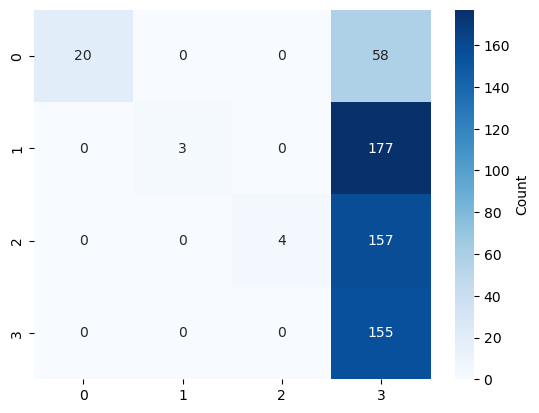

In [94]:
accuracy_gauss = accuracy_score(Y_test, Y_pred_g)
precision_g = precision_score(Y_test, Y_pred_g, average='weighted')
recall_g = recall_score(Y_test, Y_pred_g, average='weighted')
f1_g = f1_score(Y_test, Y_pred_g, average='weighted')
conf_matrix_g = confusion_matrix(Y_test, Y_pred_g)
cmap = 'Blues'
# Print the metrics
print(f"Accuracy: {accuracy_gauss}")
print(f"Precision: {precision_g}")
print(f"Recall: {recall_g}")
print(f"F1 Score: {f1_g}")
print("Confusion Matrix:")
print(conf_matrix_g)

sns.heatmap(conf_matrix_g, annot=True, fmt='d', cmap=cmap, cbar_kws={'label': 'Count'})

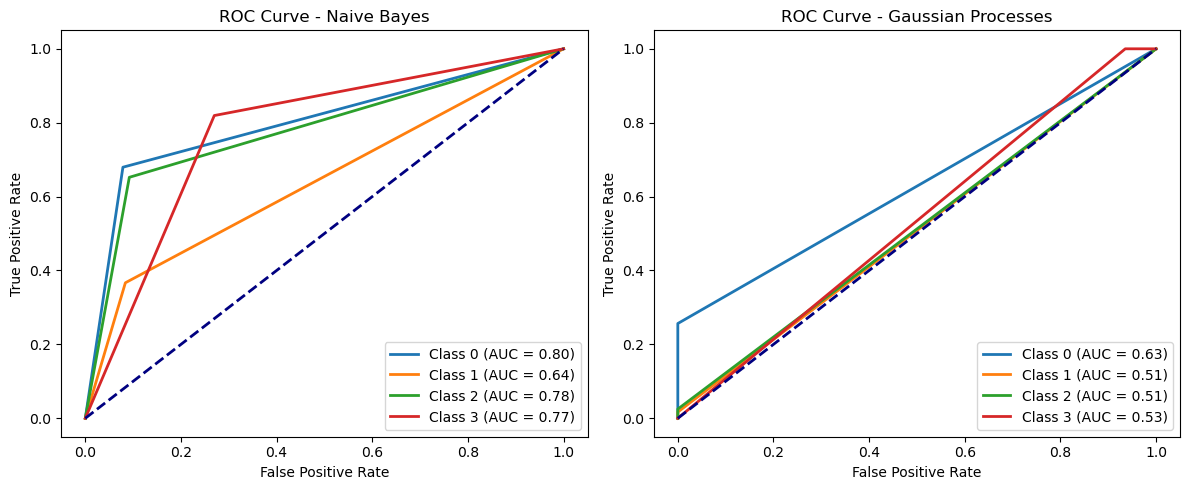

In [100]:
from sklearn.preprocessing import label_binarize

from sklearn.preprocessing import label_binarize
classes=class_labels
# Binarize the true labels and predicted labels
class_labels = [0, 1, 2,3]  # Replace [0, 1, 2] with your actual class labels
Y_test_bin = label_binarize(Y_test, classes=class_labels)
Y_pred_naive_bayes_bin = label_binarize(Y_pred_naive_bayes, classes=class_labels)
Y_pred_g_bin = label_binarize(Y_pred_g, classes=class_labels)


# Compute ROC curve and ROC area for each class
fpr_naive_bayes = dict()
tpr_naive_bayes = dict()
roc_auc_naive_bayes = dict()
for i in range(len(classes)):
    fpr_naive_bayes[i], tpr_naive_bayes[i], _ = roc_curve(Y_test_bin[:, i], Y_pred_naive_bayes_bin[:, i])
    roc_auc_naive_bayes[i] = auc(fpr_naive_bayes[i], tpr_naive_bayes[i])

fpr_g = dict()
tpr_g = dict()
roc_auc_g = dict()
for i in range(len(classes)):
    fpr_g[i], tpr_g[i], _ = roc_curve(Y_test_bin[:, i], Y_pred_g_bin[:, i])
    roc_auc_g[i] = auc(fpr_g[i], tpr_g[i])

# Plot ROC curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in range(len(classes)):
    plt.plot(fpr_naive_bayes[i], tpr_naive_bayes[i], lw=2, label=f'Class {i} (AUC = {roc_auc_naive_bayes[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
for i in range(len(classes)):
    plt.plot(fpr_g[i], tpr_g[i], lw=2, label=f'Class {i} (AUC = {roc_auc_g[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Processes')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


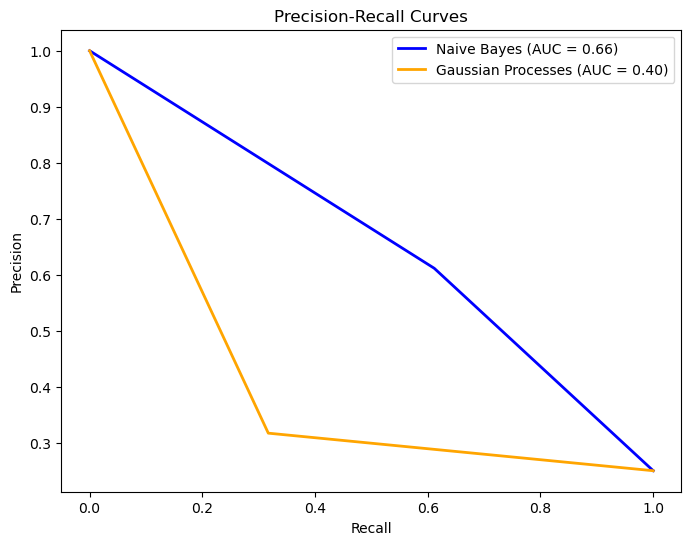

In [101]:
# Precision-Recall Curve for Naive Bayes
precision_naive_bayes, recall_naive_bayes, _ = precision_recall_curve(Y_test_bin.ravel(), Y_pred_naive_bayes_bin.ravel())
pr_auc_naive_bayes = auc(recall_naive_bayes, precision_naive_bayes)

# Precision-Recall Curve for Gaussian Processes
precision_g, recall_g, _ = precision_recall_curve(Y_test_bin.ravel(), Y_pred_g_bin.ravel())
pr_auc_g = auc(recall_g, precision_g)

# Plot Precision-Recall Curves
plt.figure(figsize=(8, 6))
plt.plot(recall_naive_bayes, precision_naive_bayes, color='blue', lw=2, label=f'Naive Bayes (AUC = {pr_auc_naive_bayes:.2f})')
plt.plot(recall_g, precision_g, color='orange', lw=2, label=f'Gaussian Processes (AUC = {pr_auc_g:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='upper right')
plt.show()


### Probablistic model 3 -> logistic regression

In [135]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_model.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test set
Y_pred_lr = logreg_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
conf_matrix_lr = confusion_matrix(Y_test, Y_pred_lr)
classification_rep_lr = classification_report(Y_test, Y_pred_lr)

print(f"Accuracy: {accuracy_lr}")
print("Confusion Matrix:")
print(conf_matrix_lr)
print("Classification Report:")
print(classification_rep_lr)


Accuracy: 0.7264808362369338
Confusion Matrix:
[[ 49  11  13   5]
 [ 33  94  17  36]
 [  1   7 147   6]
 [  3  23   2 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.63      0.60        78
           1       0.70      0.52      0.60       180
           2       0.82      0.91      0.86       161
           3       0.73      0.82      0.77       155

    accuracy                           0.73       574
   macro avg       0.70      0.72      0.71       574
weighted avg       0.72      0.73      0.72       574



In [130]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Assuming model is your Logistic Regression model and X_test, Y_test are your test data

# Binarize the true labels and predicted labels
Y_test_bin = label_binarize(Y_test, classes=[0,1,2,3])  # Replace [0, 1, 2] with your actual class labels
Y_pred_lr_bin = label_binarize(Y_pred_lr, classes=[0,1,2,3])

In [131]:
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = Y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_pred_lr_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

### Performance Metrics

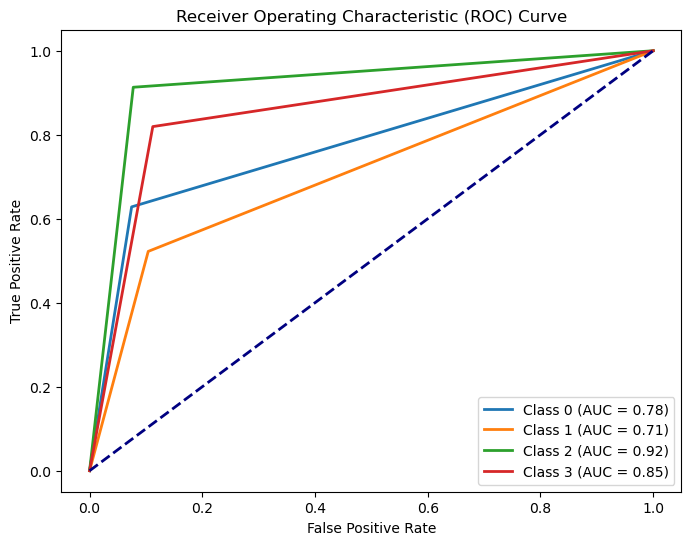

In [132]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

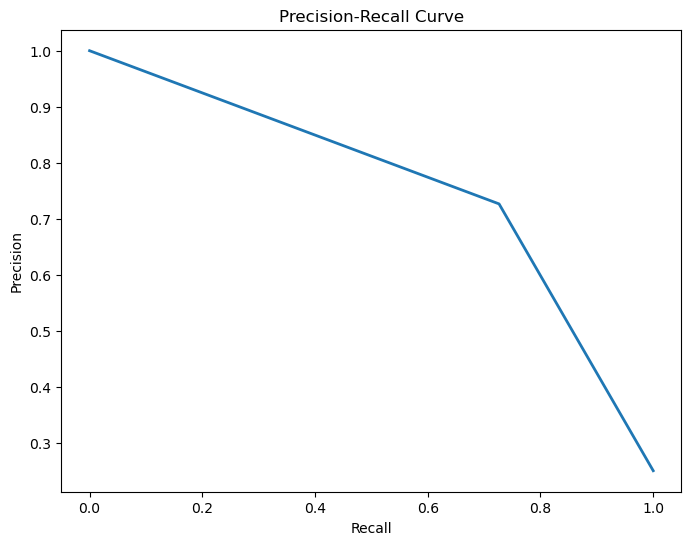

In [133]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test_bin.ravel(), Y_pred_lr_bin.ravel())

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

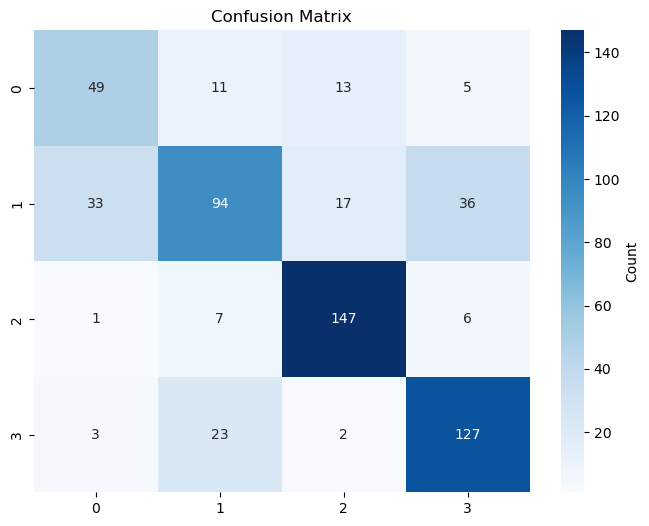

Accuracy: 0.7264808362369338


In [134]:
conf_matrix = confusion_matrix(Y_test, Y_pred_lr)
cmap = 'Blues'

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix')
plt.show()

# Accuracy Score
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
print(f"Accuracy: {accuracy_lr}")

### Comparing probablistic Models

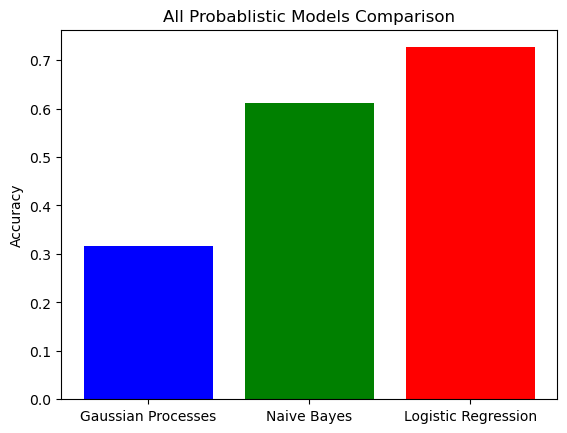

In [139]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, Y_train, X_test, Y_test are your training and test data


# Append accuracies to a list
accuracies = [accuracy_gauss, accuracy_nb, accuracy_lr]

# Plotting the necessary curves
# You can use the code snippets from the previous response to plot ROC, Precision-Recall curves, and confusion matrices.

# Bar plot for accuracies
models = ['Gaussian Processes', 'Naive Bayes', 'Logistic Regression']
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('All Probablistic Models Comparison')
plt.show()


### SO As Per this in probablistic models Logistic Regression makes the best 

### UNSUPERVISED MODELS

### 01-K-MEANS Clustering

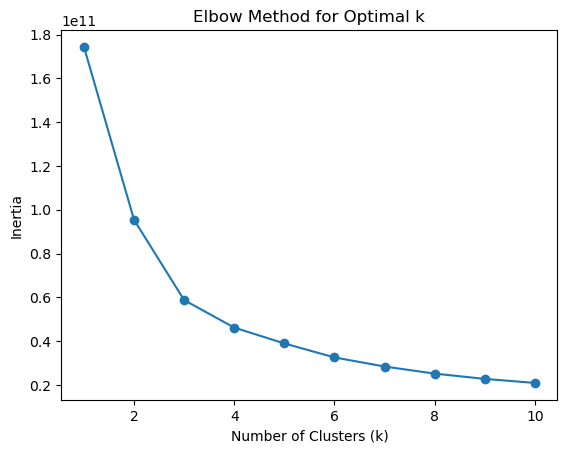

Silhouette Score: 0.45800688209258383


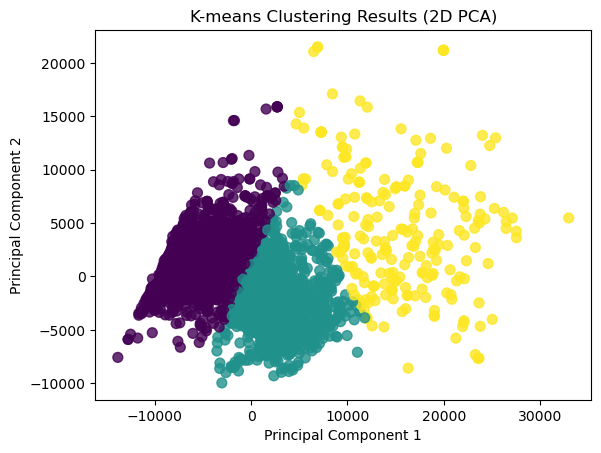

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Assuming you have a DataFrame named 'data' with your features
# Replace 'data' with your actual DataFrame


data_scaled = list_of_data_frames[0]

# Step 2: Dimensionality Reduction with PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Step 3: Optimal Number of Clusters (k)
# Using the Elbow Method to find the optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# From the Elbow Method, choose the optimal k (e.g., 3)

# Step 4: K-means Clustering with Optimal k on Reduced-dimensional Data
optimal_k = 3  # Replace with the chosen optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster_label'] = kmeans.fit_predict(data_pca)

# Step 5: Evaluation - Silhouette Score
silhouette_avg = silhouette_score(data_pca, data['cluster_label'])
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clustering results
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['cluster_label'], cmap='viridis', s=50, alpha=0.8)
plt.title('K-means Clustering Results (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### CHECKING FOR OPTIMAL K VALUE AS PER PERFORMANCE METRICS

Metrics for k=2:
Silhouette Score: 0.4347680348381939
Calinski-Harabasz Index: 2372.9553237442196
Davies-Bouldin Index: 0.9139716565082301
---------------
Metrics for k=3:
Silhouette Score: 0.4580068761789588
Calinski-Harabasz Index: 2822.2335431246247
Davies-Bouldin Index: 0.787599413961018
---------------
Metrics for k=4:
Silhouette Score: 0.3962408340131825
Calinski-Harabasz Index: 2651.261094356405
Davies-Bouldin Index: 0.8682323284308281
---------------
Metrics for k=5:
Silhouette Score: 0.36585961242821124
Calinski-Harabasz Index: 2490.334830158746
Davies-Bouldin Index: 0.8709746515030176
---------------
Metrics for k=6:
Silhouette Score: 0.364135034231341
Calinski-Harabasz Index: 2494.6689617996967
Davies-Bouldin Index: 0.927240397721676
---------------
Metrics for k=7:
Silhouette Score: 0.35554201708853717
Calinski-Harabasz Index: 2451.4466212971465
Davies-Bouldin Index: 0.9035402237475266
---------------
Metrics for k=8:
Silhouette Score: 0.34584430825358303
Calinski-Harabasz 

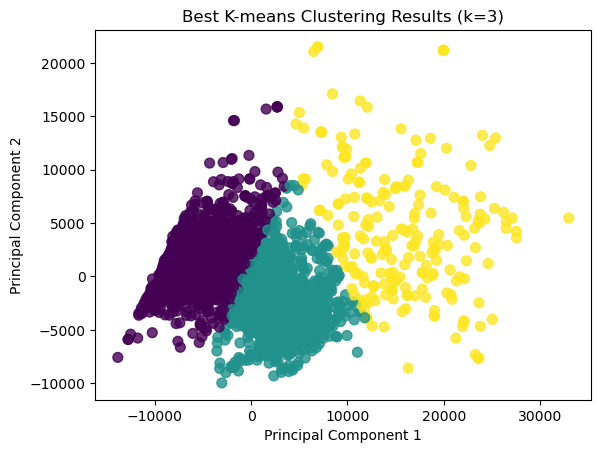

Best k: 3
Best Silhouette Score: 0.4580068761789588
Best Calinski-Harabasz Index: 2822.2335431246247
Best Davies-Bouldin Index: 0.787599413961018


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming you have a DataFrame named 'data' with your features
# Replace 'data' with your actual DataFrame

# Step 1: Feature Scaling and PCA
scaler = StandardScaler()
data_scaled = list_of_data_frames[0]

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Step 2: Find the Best Number of Clusters (k)
best_silhouette_score = -1
best_calinski_harabasz_score = -1
best_davies_bouldin_score = np.inf
best_k = 0

for k in range(2, 11):  # Try different values of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    data['cluster_label'] = kmeans.fit_predict(data_pca)

    silhouette_avg = silhouette_score(data_pca, data['cluster_label'])
    calinski_harabasz_avg = calinski_harabasz_score(data_pca, data['cluster_label'])
    davies_bouldin_avg = davies_bouldin_score(data_pca, data['cluster_label'])

    print(f"Metrics for k={k}:")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_avg}")
    print(f"Davies-Bouldin Index: {davies_bouldin_avg}")
    print("---------------")

    # Choose the best k based on a combination of metrics
    combined_metric = silhouette_avg + calinski_harabasz_avg - davies_bouldin_avg
    if combined_metric > (best_silhouette_score + best_calinski_harabasz_score - best_davies_bouldin_score):
        best_silhouette_score = silhouette_avg
        best_calinski_harabasz_score = calinski_harabasz_avg
        best_davies_bouldin_score = davies_bouldin_avg
        best_k = k

# Step 3: K-means Clustering with Best k
kmeans = KMeans(n_clusters=best_k, random_state=42)
data['best_cluster'] = kmeans.fit_predict(data_pca)

# Step 4: Visualize the Best Clustering Results
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['best_cluster'], cmap='viridis', s=50, alpha=0.8)
plt.title(f'Best K-means Clustering Results (k={best_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print the best k and corresponding metrics
print(f"Best k: {best_k}")
print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Best Calinski-Harabasz Index: {best_calinski_harabasz_score}")
print(f"Best Davies-Bouldin Index: {best_davies_bouldin_score}")


### Unsupervised model 2 -> DB-SCAN

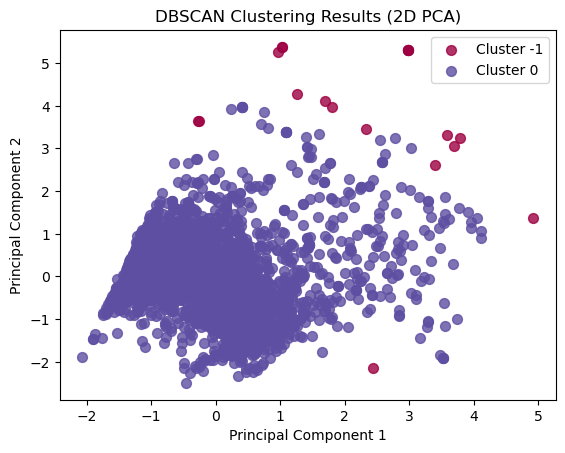

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'data' with your features
# Replace 'data' with your actual DataFrame

data_scaled = list_of_data_frames[0]

# Step 2: Dimensionality Reduction with PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Step 3: Standardize the data (if needed)
# Use StandardScaler to scale the data to have zero mean and unit variance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

# Step 4: DBSCAN Clustering
# Set the parameters (replace with your desired values)
eps_value = 0.5
min_samples_value = 5

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
cluster_labels = dbscan.fit_predict(data_scaled)

# Step 5: Evaluation - Silhouette Score (optional)
# Silhouette Score may not be applicable for DBSCAN as it doesn't require a predefined number of clusters

# Visualize the clustering results
unique_labels = np.unique(cluster_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    class_member_mask = (cluster_labels == label)
    xy = data_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], s=50, alpha=0.8, label=f'Cluster {label}')

plt.title('DBSCAN Clustering Results (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


### performance metrics for dbscan

In [104]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.6155810667951274


### COmparing Unsupervised models

Silhouette Score for K-means: 0.4580068761789588
Silhouette Score for DBSCAN: 0.6155810667951274


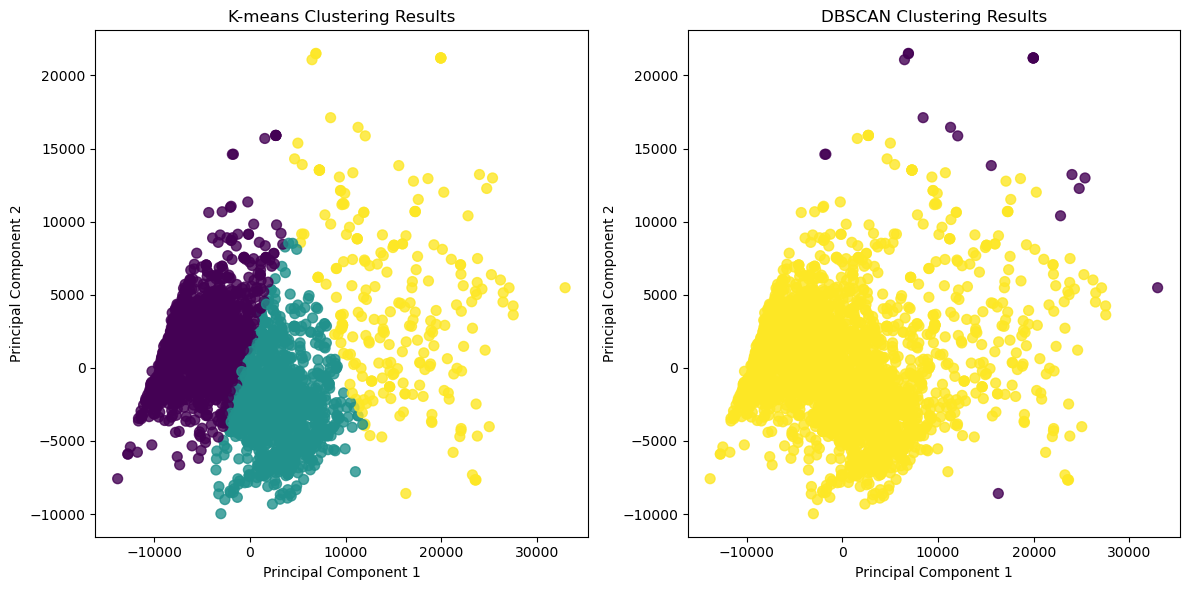

In [118]:
# Assuming you have K-means cluster labels stored in 'kmeans_cluster' column
print(f"Silhouette Score for K-means: {best_silhouette_score}")


print(f"Silhouette Score for DBSCAN: {silhouette_avg}")
data['kmeans_cluster'] = kmeans.labels_

# Visualize the clustering results for both K-means and DBSCAN
plt.figure(figsize=(12, 6))

# Plot K-means clusters
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['kmeans_cluster'], cmap='viridis', s=50, alpha=0.8)
plt.title('K-means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot DBSCAN clusters
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


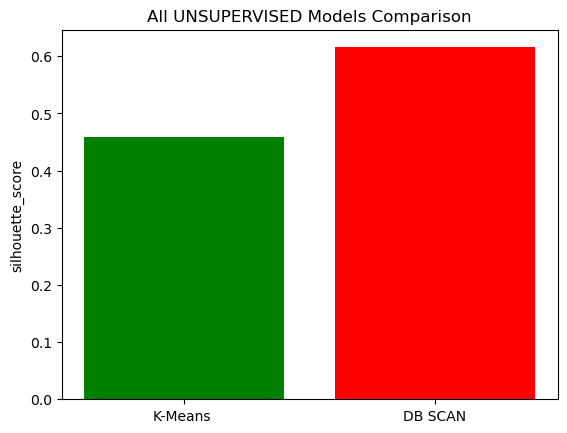

In [145]:
sc = [silhouette_kmeans,silhouette_avg]

# Plotting the necessary curves
# You can use the code snippets from the previous response to plot ROC, Precision-Recall curves, and confusion matrices.

# Bar plot for accuracies
models = ['K-Means ', 'DB SCAN']
plt.bar(models, sc, color=['green', 'red'])
plt.ylabel('silhouette_score')
plt.title('All UNSUPERVISED Models Comparison')
plt.show()

### Decision Tree

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'data' contains features and 'labels' contains binary labels (0 for no tumor, 1 for tumor)
# Replace 'data' and 'labels' with your actual data and labels


# Create a Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test set
y_pred_dt = classifier.predict(X_test)

# Evaluate the classifier
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
conf_matrix = confusion_matrix(Y_test, y_pred_dt)
classification_rep = classification_report(Y_test, y_pred_dt)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.6114982578397212
Confusion Matrix:
[[ 44  17  10   7]
 [ 22  98  13  47]
 [  8  13 130  10]
 [ 13  28   8 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.56      0.53        78
           1       0.63      0.54      0.58       180
           2       0.81      0.81      0.81       161
           3       0.62      0.68      0.65       155

    accuracy                           0.66       574
   macro avg       0.64      0.65      0.64       574
weighted avg       0.66      0.66      0.66       574



### AFter hp Tuning

In [72]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')



# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train_resampled, Y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_classifier.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test set
y_pred_dhp = best_classifier.predict(X_test)

# Evaluate the model
accuracy_dhp = accuracy_score(Y_test, y_pred_dhp)
conf_matrix_dhp = confusion_matrix(Y_test, y_pred_dhp)
classification_rep_dhp = classification_report(Y_test, y_pred_dhp)

print(f"Accuracy: {accuracy_dhp}")
print("Confusion Matrix:")
print(conf_matrix_dhp)
print("Classification Report:")
print(classification_rep_dhp)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.6602787456445993
Confusion Matrix:
[[ 44  16   9   9]
 [ 25  95  12  48]
 [  7  11 131  12]
 [ 13  23  10 109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.56      0.53        78
           1       0.66      0.53      0.58       180
           2       0.81      0.81      0.81       161
           3       0.61      0.70      0.65       155

    accuracy                           0.66       574
   macro avg       0.64      0.65      0.64       574
weighted avg       0.66      0.66      0.66       574



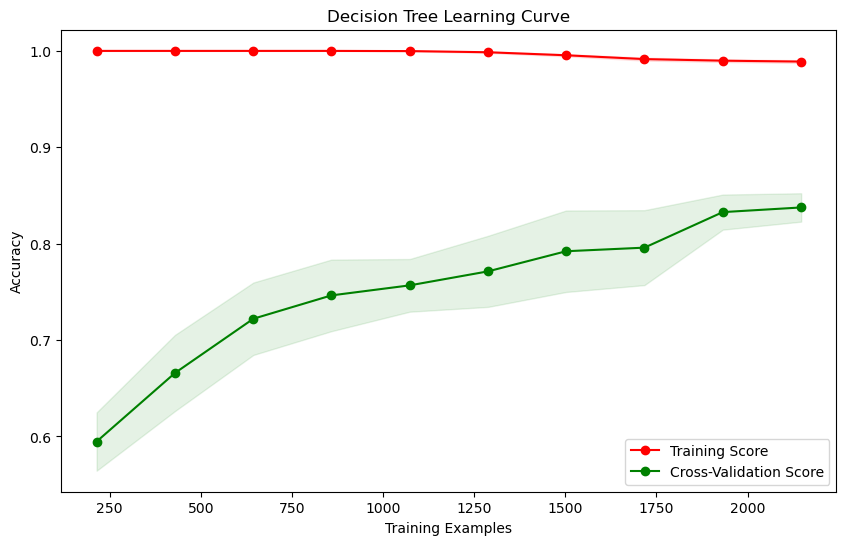

In [119]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train_resampled and Y_train_resampled are your training data
# and X_test, Y_test are your test data



# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    classifier, X_train_resampled, Y_train_resampled, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("Decision Tree Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()


<Axes: >

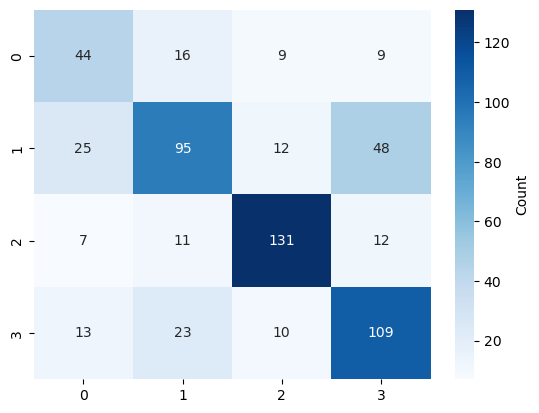

In [73]:
sns.heatmap(conf_matrix_dhp, annot=True, fmt='d', cmap=cmap, cbar_kws={'label': 'Count'})

In [74]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)



# Perform the randomized search to find the best hyperparameters
random_search.fit(X_train_resampled, Y_train_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_classifier.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test set
y_pred_rdt = best_classifier.predict(X_test)

# Evaluate the model
accuracy_rdt = accuracy_score(Y_test, y_pred_rdt)
conf_matrix_rdt = confusion_matrix(Y_test, y_pred_rdt)
classification_rep_rdt = classification_report(Y_test, y_pred_rdt)

print(f"Accuracy: {accuracy_rdt}")
print("Confusion Matrix:")
print(conf_matrix_rdt)
print("Classification Report:")
print(classification_rep_rdt)


Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'}
Accuracy: 0.6376306620209059
Confusion Matrix:
[[ 43  21   8   6]
 [ 31  95  13  41]
 [ 11  14 128   8]
 [ 10  36   9 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.55      0.50        78
           1       0.57      0.53      0.55       180
           2       0.81      0.80      0.80       161
           3       0.65      0.65      0.65       155

    accuracy                           0.64       574
   macro avg       0.62      0.63      0.62       574
weighted avg       0.64      0.64      0.64       574



<Axes: >

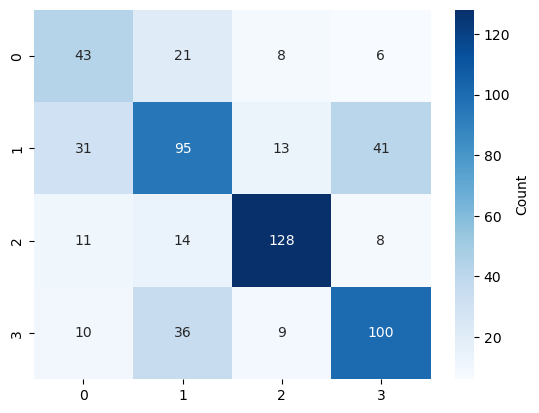

In [75]:
sns.heatmap(conf_matrix_rdt, annot=True, fmt='d', cmap=cmap, cbar_kws={'label': 'Count'})

### Ensemble model 1 ->gradient boo

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split



# Create a Gradient Boosting classifier with default parameters
classifier = GradientBoostingClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test set
y_pred_gb = classifier.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(Y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(Y_test, y_pred_gb)
classification_rep_gb = classification_report(Y_test, y_pred_gb)

print(f"Accuracy: {accuracy_gb}")
print("Confusion Matrix:")
print(conf_matrix_gb)
print("Classification Report:")
print(classification_rep_gb)


Accuracy: 0.818815331010453
Confusion Matrix:
[[ 56  11   5   6]
 [ 15 130  10  25]
 [  0   4 154   3]
 [  0  21   4 130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        78
           1       0.78      0.72      0.75       180
           2       0.89      0.96      0.92       161
           3       0.79      0.84      0.82       155

    accuracy                           0.82       574
   macro avg       0.81      0.81      0.81       574
weighted avg       0.82      0.82      0.82       574



### HT took more than 8 hrs so stopped

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Gradient Boosting classifier
classifier = GradientBoostingClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the GridSearchCV object
grid_search.fit(X_train_resampled, Y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_classifier = GradientBoostingClassifier(**best_params, random_state=42)
best_classifier.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test set
y_pred_gbt = best_classifier.predict(X_test)

# Evaluate the model
accuracy_gbt = accuracy_score(Y_test, y_pred_gbt)
conf_matrix_gbt = confusion_matrix(Y_test, y_pred_gbt)
classification_rep_gbt = classification_report(Y_test, y_pred_gbt)

print(f"Accuracy: {accuracy_gbt}")
print("Confusion Matrix:")
print(conf_matrix_gbt)
print("Classification Report:")
print(classification_rep_gbt)


KeyboardInterrupt: 

### MODEL 2 -> ADABOoST

In [77]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming 'data' contains features and 'labels' contains binary labels (0 for no tumor, 1 for tumor)
# Replace 'data' and 'labels' with your actual data and labels

# Split the data into training and testing sets


# Create a Decision Tree classifier as the base learner
base_classifier = DecisionTreeClassifier(max_depth=1)  # You can adjust max_depth as needed

# Create an AdaBoost classifier with the base learner
classifier_adaboost = AdaBoostClassifier(base_classifier, random_state=42)

# Train the classifier
classifier_adaboost.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test set
y_pred_adaboost = classifier_adaboost.predict(X_test)

# Evaluate the model
accuracy_adaboost = accuracy_score(Y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(Y_test, y_pred_adaboost)
classification_rep_adaboost = classification_report(Y_test, y_pred_adaboost)

print(f"Accuracy: {accuracy_adaboost}")
print("Confusion Matrix:")
print(conf_matrix_adaboost)
print("Classification Report:")
print(classification_rep_adaboost)


Accuracy: 0.6062717770034843
Confusion Matrix:
[[ 31  33   9   5]
 [ 21  87  13  59]
 [  5  16 128  12]
 [  4  41   8 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.40      0.45        78
           1       0.49      0.48      0.49       180
           2       0.81      0.80      0.80       161
           3       0.57      0.66      0.61       155

    accuracy                           0.61       574
   macro avg       0.60      0.58      0.59       574
weighted avg       0.61      0.61      0.60       574



### MOdel 3 -> bagging

In [78]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming 'data' contains features and 'labels' contains binary labels (0 for no tumor, 1 for tumor)
# Replace 'data' and 'labels' with your actual data and labels

# Split the data into training and testing sets
# Create a Decision Tree classifier as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=5)  # You can adjust max_depth as needed

# Create a BaggingClassifier with the base estimator
classifier_bagging = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)

# Train the classifier
classifier_bagging.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test set
y_pred_bagging = classifier_bagging.predict(X_test)

# Evaluate the model
accuracy_bagging = accuracy_score(Y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(Y_test, y_pred_bagging)
classification_rep_bagging = classification_report(Y_test, y_pred_bagging)

print(f"Accuracy: {accuracy_bagging}")
print("Confusion Matrix:")
print(conf_matrix_bagging)
print("Classification Report:")
print(classification_rep_bagging)


Accuracy: 0.6585365853658537
Confusion Matrix:
[[ 51   8  11   8]
 [ 30  77  22  51]
 [  3   7 144   7]
 [  5  25  19 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.65      0.61        78
           1       0.66      0.43      0.52       180
           2       0.73      0.89      0.81       161
           3       0.62      0.68      0.65       155

    accuracy                           0.66       574
   macro avg       0.65      0.66      0.65       574
weighted avg       0.66      0.66      0.65       574



###  MODEL 4->STACKING m1

In [79]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# Define base models
base_models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42))
]

# Define the meta-model (stacking classifier)
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier
stacking_classifier.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test set
y_pred_stacking = stacking_classifier.predict(X_test)

# Evaluate the stacking classifier
accuracy_stacking = accuracy_score(Y_test, y_pred_stacking)
conf_matrix_stacking = confusion_matrix(Y_test, y_pred_stacking)
classification_rep_stacking = classification_report(Y_test, y_pred_stacking)

print(f"Accuracy with Stacking Classifier: {accuracy_stacking}")
print("Confusion Matrix:")
print(conf_matrix_stacking)
print("Classification Report:")
print(classification_rep_stacking)


Accuracy with Stacking Classifier: 0.818815331010453
Confusion Matrix:
[[ 40  30   4   4]
 [  8 145   7  20]
 [  0   6 152   3]
 [  0  18   4 133]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.51      0.63        78
           1       0.73      0.81      0.77       180
           2       0.91      0.94      0.93       161
           3       0.83      0.86      0.84       155

    accuracy                           0.82       574
   macro avg       0.83      0.78      0.79       574
weighted avg       0.82      0.82      0.81       574



### ###  MODEL 4->STACKING m2

In [82]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42)),
    ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42))
]

# Define the meta-model (stacking classifier)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier
stacking_classifier.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test set
y_pred_stacking2 = stacking_classifier.predict(X_test)

# Evaluate the stacking classifier
accuracy_stacking2 = accuracy_score(Y_test, y_pred_stacking2)
conf_matrix_stacking2 = confusion_matrix(Y_test, y_pred_stacking2)
classification_rep_stacking2= classification_report(Y_test, y_pred_stacking2)

print(f"Accuracy with Stacking Classifier: {accuracy_stacking2}")
print("Confusion Matrix:")
print(conf_matrix_stacking2)
print("Classification Report:")
print(classification_rep_stacking2)


Accuracy with Stacking Classifier: 0.8536585365853658
Confusion Matrix:
[[ 49  22   4   3]
 [  9 145   8  18]
 [  0   5 155   1]
 [  0  13   1 141]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.63      0.72        78
           1       0.78      0.81      0.79       180
           2       0.92      0.96      0.94       161
           3       0.87      0.91      0.89       155

    accuracy                           0.85       574
   macro avg       0.85      0.83      0.84       574
weighted avg       0.85      0.85      0.85       574



In [121]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'final_estimator__C': [0.001, 0.01, 0.1, 1, 10],
    'final_estimator__penalty': ['l1', 'l2'],
    'knn__n_neighbors': [3, 5, 7],
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 5, 10],
    'gradient_boosting__n_estimators': [50, 100, 200],
    'gradient_boosting__learning_rate': [0.01, 0.1, 0.2],
}

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(max_iter=1000, random_state=42))

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=stacking_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the GridSearchCV object
grid_search.fit(X_train_resampled, Y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42, **best_params)
)
best_stacking_classifier.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test set
y_pred_stacking11 = best_stacking_classifier.predict(X_test)

# Evaluate the model
accuracy_stacking11 = accuracy_score(Y_test, y_pred_stacking11)
conf_matrix_stacking11 = confusion_matrix(Y_test, y_pred_stacking11)
classification_rep_stacking11 = classification_report(Y_test, y_pred_stacking11)

print(f"Accuracy with Stacking Classifier: {accuracy_stacking11}")
print("Confusion Matrix:")
print(conf_matrix_stacking11)
print("Classification Report:")
print(classification_rep_stacking11)


KeyboardInterrupt: 